# Лабораторна робота 2.

## Створення штучно синтезованих наборів даних

**Лабораторна робота виконується індивідуально. Використання запозиченого коду буде оцінюватись в 0 балів.**

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Завдання 1: Синтезувати набір даних, який складається з двох лінійно роздільних множин, що можуть бути використані для навчання моделей класифікації.**


**Роз'яснення до завдання 1:**

1. **Опис набору даних:**
   - Набір даних повинен містити дві класифікаційні мітки (клас 1 і клас 2).
   - Кожен об'єкт набору даних повинен бути представленим у вигляді точки в двовимірному просторі $(x, y)$.

2. **Вимоги до генерації даних:**
   - Обидва класи мають бути лінійно роздільні, тобто можна знайти таку пряму, яка розділяє дані двох класів без помилок.
   - Дані повинні бути рівномірно розподілені по всьому простору, але з певним відхиленням для забезпечення реалістичності.
   - Можливі варіанти синтезу:
     - Використання нормального розподілу для генерації точок навколо центроїдів двох класів.
     - Додавання невеликого шуму до кожного класу для забезпечення варіативності даних.

3. **Параметри набору даних:**
   - Кількість точок (об'єктів) у наборі даних: **500** для кожного класу (всього **1000**).
   - Формат вихідних даних: CSV-файл, де кожен рядок містить значення координат $(x, y)$ і відповідну мітку класу.

4. **Очікуваний результат:**
   - CSV-файл, який містить **1000** рядків з трьома колонками: $x$, $y$, $class$.
   - Перевірка лінійної роздільності: Побудуйте графік з нанесеними точками і покажіть лінію, яка розділяє два класи.

5. **Додаткові умови:**
- Зробіть аналіз набору даних, побудувавши гістограми розподілу даних для кожного класу окремо.
- Опишіть підходи, які використовувалися для створення набору даних.

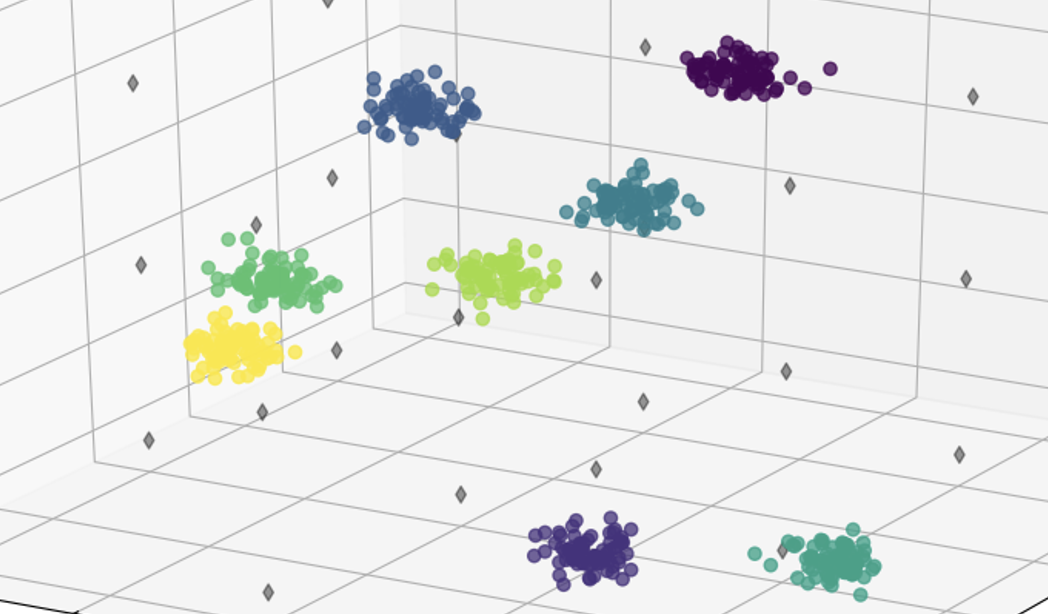

In [13]:
n_samples_per_class = 500
n_features = 2
noise = 0.9

centers = {
    0: np.array([3, 3]),
    1: np.array([-3, -3])
}

np.random.seed(22)

points = {}
labels = {}

for label, center in centers.items():
    points[label] = np.random.normal(loc=center, scale=1.0, size=(n_samples_per_class, n_features))
    labels[label] = np.full(n_samples_per_class, label)

X = np.vstack([points[0], points[1]])
y = np.concatenate([labels[0], labels[1]])

df = pd.DataFrame(X, columns=['x', 'y'])
df['class'] = y

df.to_csv('task1.csv', index=False)

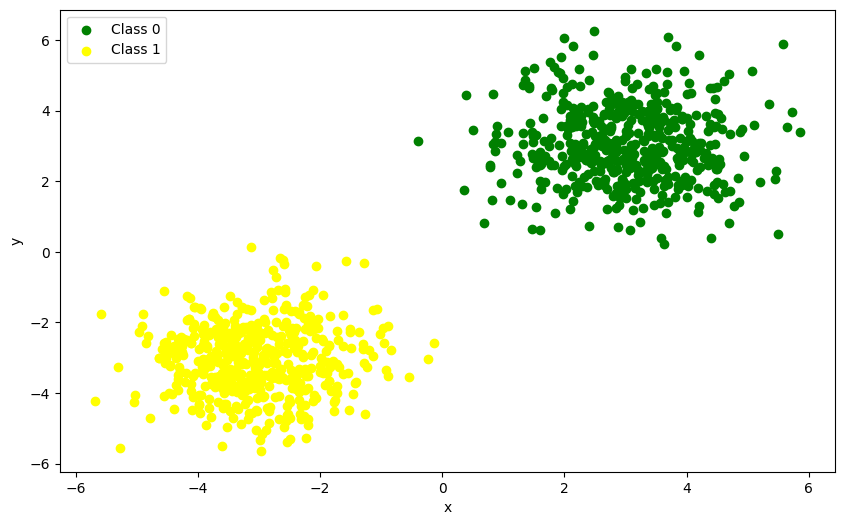

In [14]:
plt.figure(figsize=(10, 6))
for label, color in zip(centers.keys(), ['green', 'yellow']):
    plt.scatter(df[df['class'] == label]['x'], df[df['class'] == label]['y'], color=color, label=f'Class {label}')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

**Завдання 2: Синтезувати набір даних, який складається з трьох множин (класів), що мають часткове перекриття, для використання в задачах класифікації та аналізу даних.**

**Роз'яснення до завдання 2:**

1. **Опис набору даних:**
   - Набір даних повинен містити три класифікаційні мітки (клас 1, клас 2, клас 3).
   - Кожен об'єкт набору даних повинен бути представленим у вигляді точки в двовимірному просторі $(x, y)$.

2. **Вимоги до генерації даних:**
   - Дані мають утворювати три множини, кожна з яких розподілена навколо свого центру, але з перекриттям з іншими множинами.
   - Кожен клас повинен мати певну ступінь перекриття з іншими класами, що призводить до часткової змішуваності точок з різними мітками.
   - Можливі варіанти синтезу:
     - Використання нормального розподілу для генерації точок навколо центроїдів кожного класу.
     - Додавання більшого шуму або кореляції між точками для збільшення ступеня перекриття.

3. **Параметри набору даних:**
   - Кількість точок (об'єктів) у наборі даних: **300** для кожного класу (всього **900**).
   - Формат вихідних даних: CSV-файл, де кожен рядок містить значення координат $(x, y)$ і відповідну мітку класу.

4. **Очікуваний результат:**
   - CSV-файл, який містить **900** рядків з трьома колонками: $x$, $y$, $class$.
   - Побудуйте графік з нанесеними точками для всіх трьох класів, щоб візуалізувати перекриття множин.
   - Перевірте, чи дійсно дані утворюють перекриття між класами, показавши частку точок, які належать до зон перекриття.

5. **Додаткові умови:**
   - Побудуйте кореляційні графіки та гістограми розподілу для кожного класу.
   - Опишіть підходи, які використовувалися для створення набору даних, і обґрунтуйте вибір параметрів.

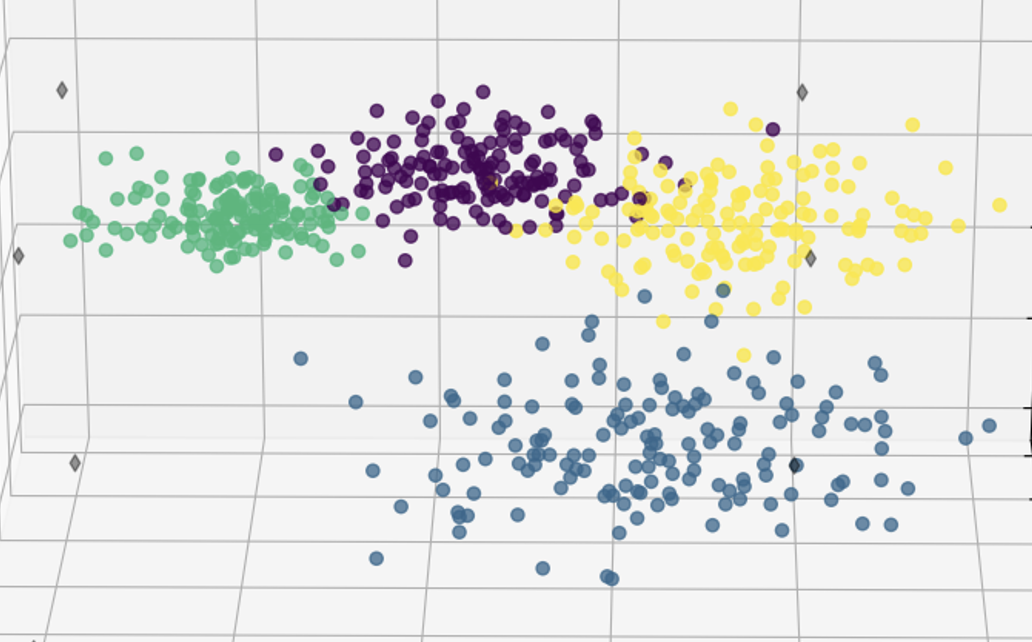

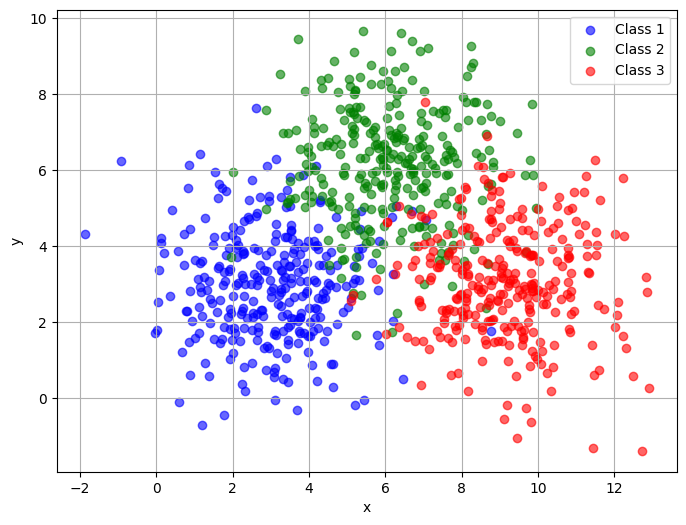

In [15]:
np.random.seed(42)

centers = {
    1: [3, 3],
    2: [6, 6],
    3: [9, 3]
}

num_points = 300
spread = 1.5

data = []
for label, center in centers.items():
    x = np.random.normal(center[0], spread, num_points)
    y = np.random.normal(center[1], spread, num_points)
    data.append(pd.DataFrame({'x': x, 'y': y, 'class': label}))

df = pd.concat(data, ignore_index=True)

df.to_csv('task2.csv', index=False)

plt.figure(figsize=(8, 6))
for label, color in zip(centers.keys(), ['blue', 'green', 'red']):
    subset = df[df['class'] == label]
    plt.scatter(subset['x'], subset['y'], label=f'Class {label}', alpha=0.6, c=color)

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

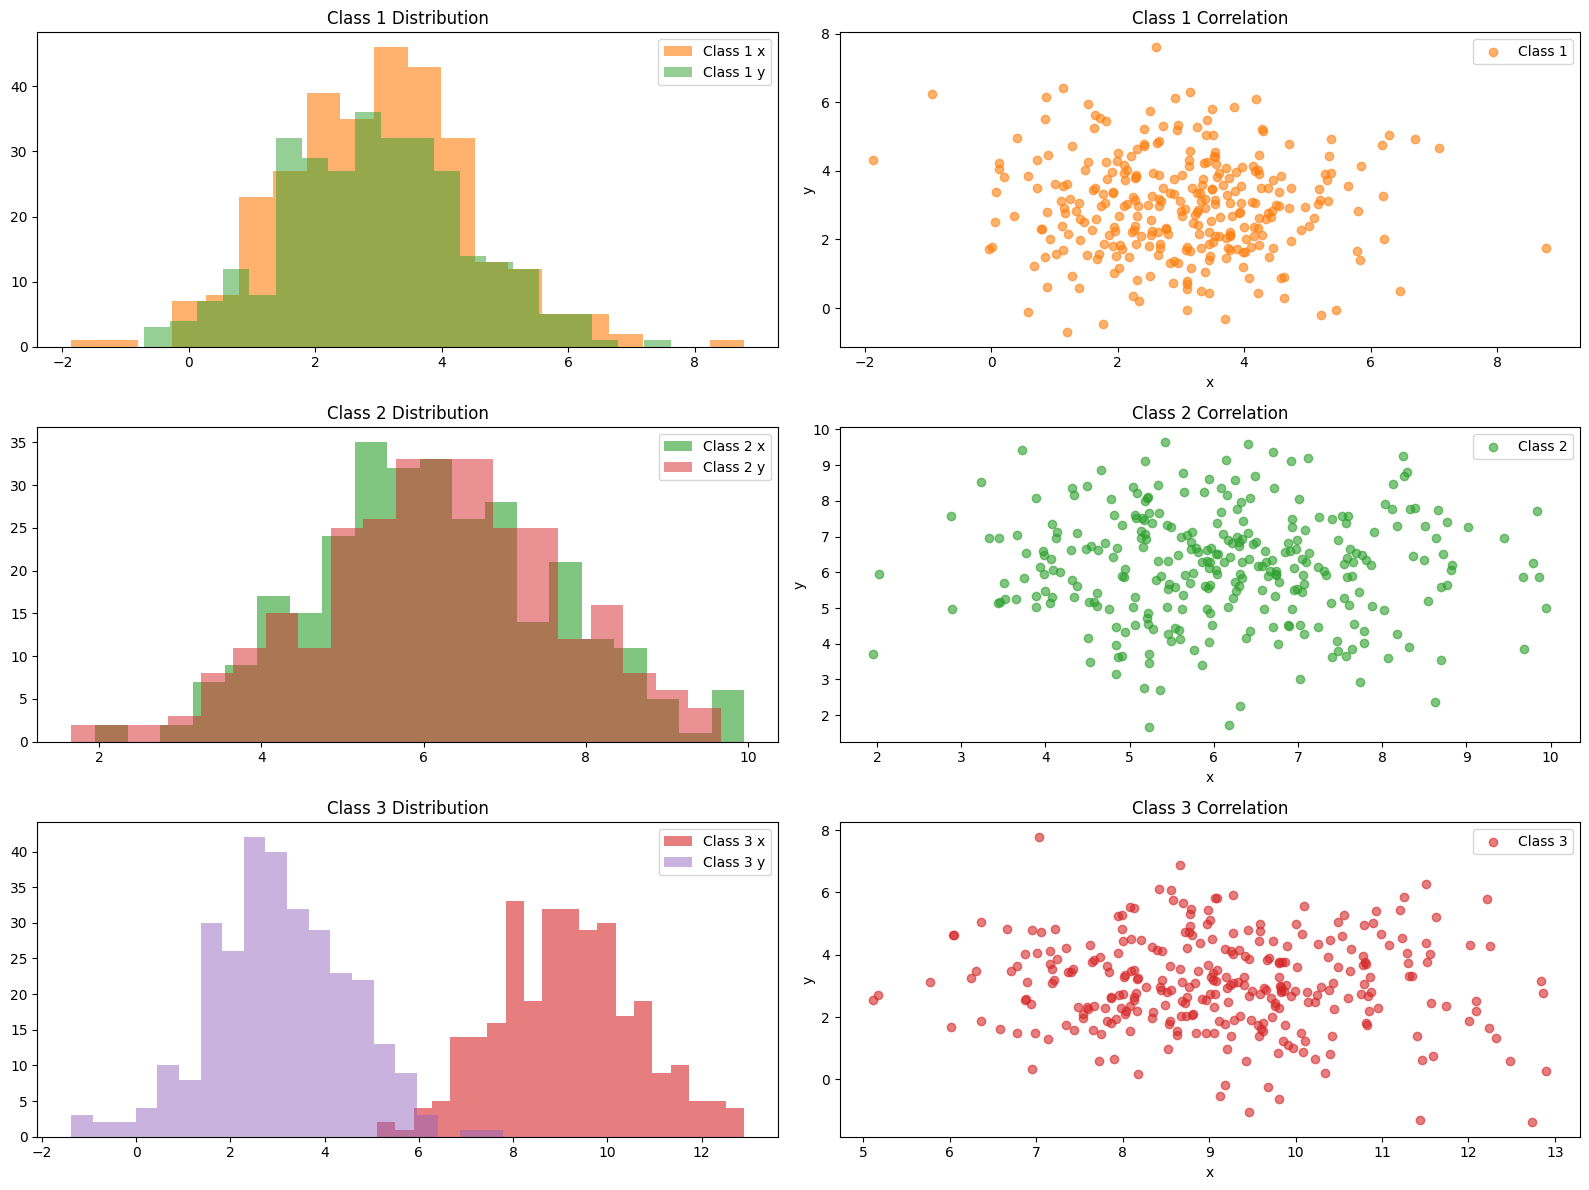

In [16]:
plt.figure(figsize=(16, 12))

for i, label in enumerate(df['class'].unique(), start=1):
    subset = df[df['class'] == label]

    plt.subplot(3, 2, i * 2 - 1)
    plt.hist(subset['x'], bins=20, alpha=0.6, color=f'C{i}', label=f'Class {int(label)} x')
    plt.hist(subset['y'], bins=20, alpha=0.5, color=f'C{i+1}', label=f'Class {int(label)} y')
    plt.legend()
    plt.title(f'Class {int(label)} Distribution')

    plt.subplot(3, 2, i * 2)
    plt.scatter(subset['x'], subset['y'], alpha=0.6, label=f'Class {int(label)}', color=f'C{i}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'Class {int(label)} Correlation')
    plt.legend()

plt.tight_layout()
plt.show()

**Завдання 3: Синтезувати набір даних, який складається з двох множин у формі "тор в торі", де одна множина має форму внутрішнього тора, а інша — зовнішнього тора.**

**Роз'яснення до завдання 3:**

1. **Опис набору даних:**
   - Набір даних повинен містити дві класифікаційні мітки (клас 1 і клас 2).
   - Кожен об'єкт набору даних повинен бути представленим у вигляді точки в двовимірному просторі $(x, y)$.

2. **Вимоги до генерації даних:**
   - Дані повинні утворювати дві множини у формі тора: одна множина повинна бути розташована всередині іншої (тобто, "тор в торі").
   - Внутрішній тор (клас 1) повинен мати менший радіус і ширину, ніж зовнішній тор (клас 2).
   - Розподіл точок повинен бути рівномірним вздовж кожного тора з додаванням невеликого шуму для забезпечення варіативності.

3. **Параметри набору даних:**
   - Кількість точок (об'єктів) у наборі даних: **500** для кожного класу (всього **1000**).
   - Формат вихідних даних: CSV-файл, де кожен рядок містить значення координат $(x, y) $і відповідну мітку класу.

4. **Очікуваний результат:**
   - CSV-файл, який містить **1000** рядків з трьома колонками: $x$, $y$, $class$.
   - Побудуйте графік з нанесеними точками для обох класів, щоб візуалізувати форму "тор в торі".
   - Перевірте розподіл точок уздовж кожного тора, побудувавши радіальні гістограми для кожного класу.

5. **Додаткові умови:**
   - Побудуйте окремі графіки, які демонструють розподіл даних для кожного тора окремо.
   - Опишіть процес генерації даних та поясніть вибір параметрів для кожного тора.

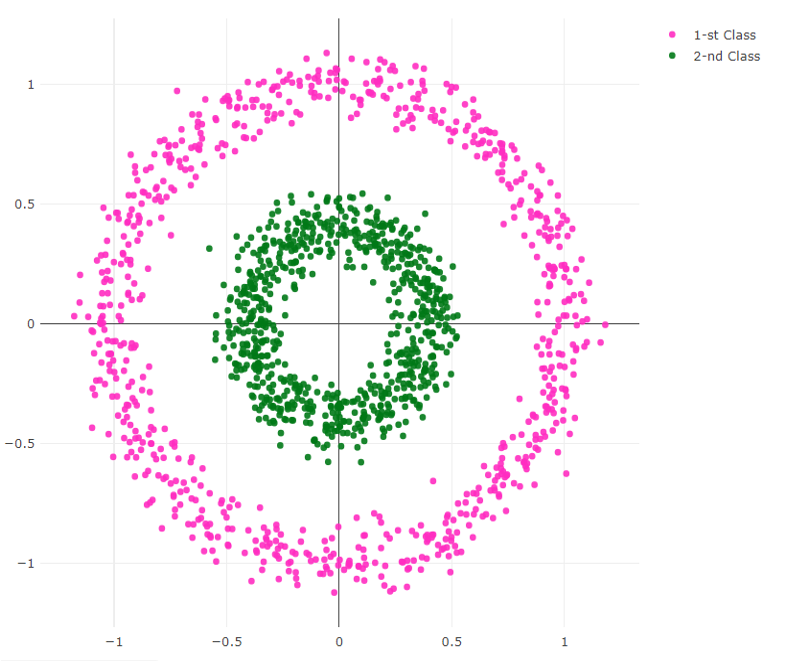

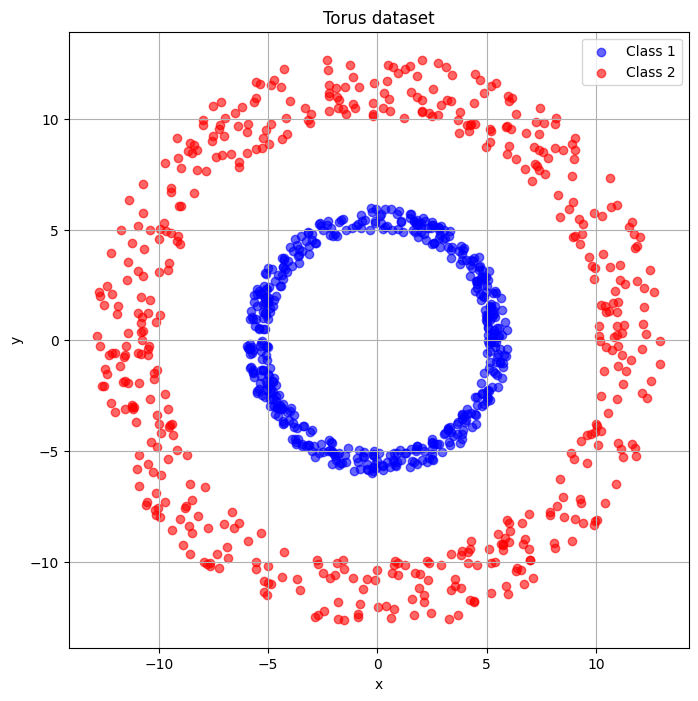

In [17]:
np.random.seed(22)

num_points = 500
radii = {
    "inner": {"radius": 5, "width": 1},
    "outer": {"radius": 10, "width": 3}
}

theta_inner = 2 * np.pi * np.random.rand(num_points)
r_inner = radii["inner"]["radius"] + radii["inner"]["width"] * np.random.rand(num_points)
x_inner = r_inner * np.cos(theta_inner)
y_inner = r_inner * np.sin(theta_inner)
class_inner = np.ones(num_points)

theta_outer = 2 * np.pi * np.random.rand(num_points)
r_outer = radii["outer"]["radius"] + radii["outer"]["width"] * np.random.rand(num_points)
x_outer = r_outer * np.cos(theta_outer)
y_outer = r_outer * np.sin(theta_outer)
class_outer = np.ones(num_points) * 2

df_torus = pd.DataFrame({
    'x': np.concatenate([x_inner, x_outer]),
    'y': np.concatenate([y_inner, y_outer]),
    'class': np.concatenate([class_inner, class_outer])
})

df_torus.to_csv('task3.csv', index=False)

plt.figure(figsize=(8, 8))
plt.scatter(x_inner, y_inner, label='Class 1', alpha=0.6, c='blue')
plt.scatter(x_outer, y_outer, label='Class 2', alpha=0.6, c='red')
plt.title('Torus dataset')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

**Завдання 4: Синтезувати набір даних, який складається з двох множин, що утворюють подвійну спіраль, де одна спіраль огортає іншу.**

**Роз'яснення до завдання 4:**

1. **Опис набору даних:**
   - Набір даних повинен містити дві класифікаційні мітки (клас 1 і клас 2).
   - Кожен об'єкт набору даних повинен бути представленим у вигляді точки в двовимірному просторі $(x, y)$.

2. **Вимоги до генерації даних:**
   - Дані повинні утворювати дві спіралі, закручені одна в іншу, так щоб кожна спіраль відповідала одному з класів.
   - Спіралі повинні мати протилежні напрямки закручування (одна за годинниковою стрілкою, інша — проти).
   - Кожна спіраль повинна бути рівномірно заповнена точками з невеликим додаванням шуму для варіативності даних.

3. **Параметри набору даних:**
   - Кількість точок (об'єктів) у наборі даних: **500** для кожного класу (всього **1000**).
   - Формат вихідних даних: CSV-файл, де кожен рядок містить значення координат $(x, y)$ і відповідну мітку класу.

4. **Очікуваний результат:**
   - CSV-файл, який містить **1000** рядків з трьома колонками: $x$, $y$, $class$.
   - Побудуйте графік з нанесеними точками для обох спіралей, щоб візуалізувати структуру "спіраль у спіралі".
   - Проаналізуйте відмінності у розподілі точок для обох класів та оцініть складність їх розділення.

5. **Додаткові умови:**
   - Створіть окремі графіки, що показують як закручується кожна спіраль.
   - Опишіть процес генерації даних, включаючи параметри, що використовувалися для визначення форми спіралей.

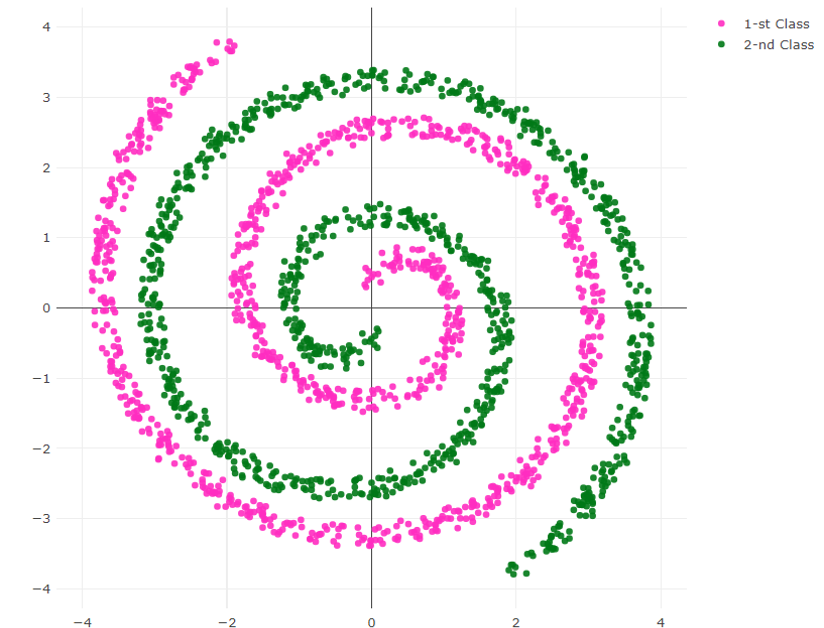

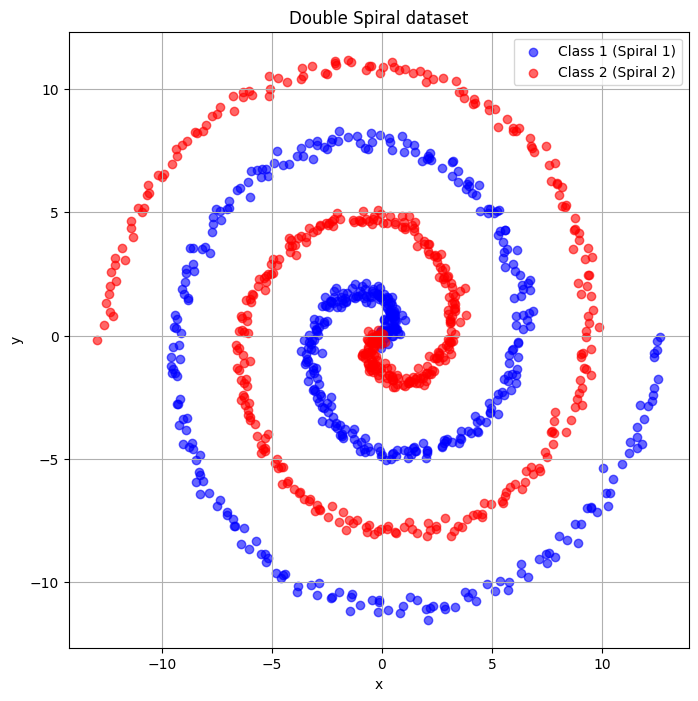

In [18]:
np.random.seed(22)

num_points = 500
theta = np.linspace(0, 4 * np.pi, num_points)
z_noise = 0.2

x1 = theta * np.cos(theta) + z_noise * np.random.randn(num_points)
y1 = theta * np.sin(theta) + z_noise * np.random.randn(num_points)
class1 = np.ones(num_points)

x2 = -theta * np.cos(theta) + z_noise * np.random.randn(num_points)
y2 = -theta * np.sin(theta) + z_noise * np.random.randn(num_points)
class2 = np.ones(num_points) * 2

df_spiral = pd.DataFrame({
    'x': np.concatenate([x1, x2]),
    'y': np.concatenate([y1, y2]),
    'class': np.concatenate([class1, class2])
})

df_spiral.to_csv('task4.csv', index=False)

plt.figure(figsize=(8, 8))
plt.scatter(x1, y1, label='Class 1 (Spiral 1)', alpha=0.6, c='blue')
plt.scatter(x2, y2, label='Class 2 (Spiral 2)', alpha=0.6, c='red')
plt.title('Double Spiral dataset')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

**Завдання 5: Синтезувати кілька наборів даних, що описують траєкторії системи Лоренца з різними параметрами, дослідити вплив параметрів на динаміку системи та візуалізувати результати.**


### 5.1: Теоретичне підґрунтя

**Опис системи Лоренца:**
Система Лоренца — це набір трьох нелінійних диференціальних рівнянь, що описують динаміку тривимірної системи з хаотичною поведінкою. Вона визначається такими рівняннями:

$$
\frac{dx}{dt} = \sigma (y - x)
$$

$$
\frac{dy}{dt} = x (\rho - z) - y
$$

$$
\frac{dz}{dt} = xy - \beta z
$$

Де:
- $(x, y, z)$ — змінні стану системи.
- $\sigma$ — параметр, що відповідає за швидкість зміни (часто називають "параметр Прандтля").
- $\rho$ — параметр, що відповідає за різницю температур у системі (відповідає за інтенсивність конвекції).
- $\beta$  — параметр, що відповідає за співвідношення розмірів.

**Роз'яснення до завдання:**
- Згенерувати дані для системи Лоренца за допомогою різних значень параметрів $\sigma$, $\rho$ та $\beta$.
- Проаналізувати вплив зміни параметрів на траєкторії системи.
- Візуалізувати результати в тривимірному просторі для кожного набору даних.

### 5.2: Генерація та візуалізація набору даних

**Що треба зробити:**

1. **Генерація даних:**
   - Вибрати декілька різних комбінацій параметрів $\sigma$, $\rho$ та $\beta$.
   - Використовуючи числовий метод (наприклад, метод Рунге-Кутти 4-го порядку), згенерувати траєкторії системи Лоренца для кожного набору параметрів.

2. **Візуалізація:**
   - Для кожного набору параметрів побудувати тривимірні графіки траєкторій.
   - Відобразити траєкторії в просторі $(x, y, z)$.

3. **Аналіз:**
   - Порівняти результати для різних наборів параметрів.
   - Описати, як зміна кожного з параметрів впливає на поведінку системи (наприклад, перехід від стабільного до хаотичного режиму).

**Очікуваний результат:**
- Кілька наборів даних, що описують траєкторії системи Лоренца з різними параметрами (мінімум 3).
- Візуалізації цих траєкторій у тривимірному просторі.
- Аналіз і опис впливу параметрів на динаміку системи.

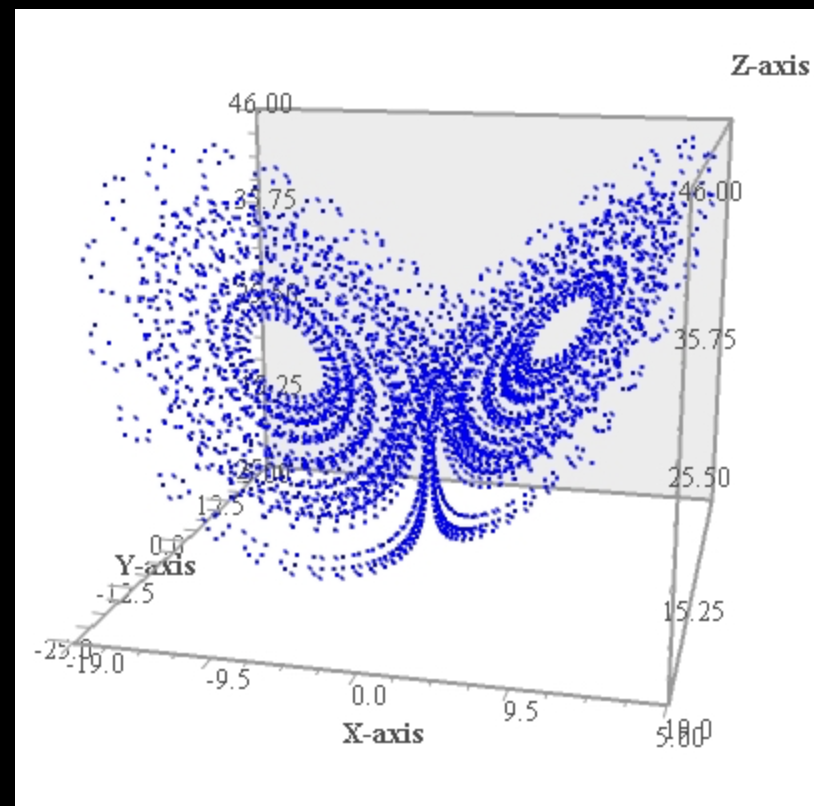

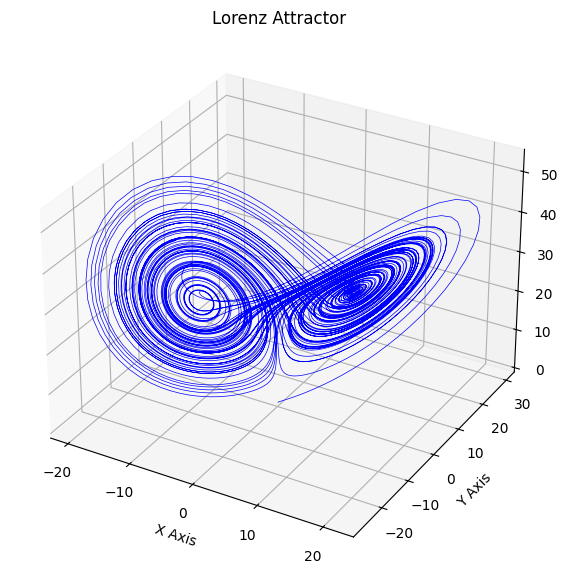

In [19]:
sigma = 10
rho = 28
beta = 2.667

initial_conditions = [0.1, 0, 0]
dt = 0.01
steps = 10000

trajectory = np.empty((steps + 1, 3))
trajectory[0] = initial_conditions

for t in range(steps):
    x, y, z = trajectory[t]
    dx = sigma * (y - x)
    dy = x * (rho - z) - y
    dz = x * y - beta * z
    trajectory[t + 1] = [x + dx * dt, y + dy * dt, z + dz * dt]

df_lorenz = pd.DataFrame(trajectory, columns=['x', 'y', 'z'])
df_lorenz.to_csv('task5.1.csv', index=False)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(projection='3d')
ax.plot(trajectory[:, 0], trajectory[:, 1], trajectory[:, 2], lw=0.5, color='blue')
ax.set_title('Lorenz Attractor')
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')
plt.show()

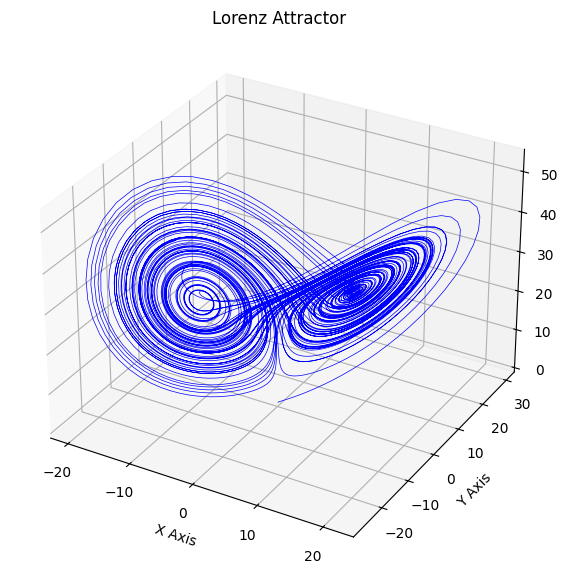

In [20]:
sigma = 10
rho = 28
beta = 2.667

initial_conditions = [0.1, 0, 0]
dt = 0.01
steps = 10000

trajectory = np.empty((steps + 1, 3))
trajectory[0] = initial_conditions

for t in range(steps):
    x, y, z = trajectory[t]
    dx = sigma * (y - x)
    dy = x * (rho - z) - y
    dz = x * y - beta * z
    trajectory[t + 1] = [x + dx * dt, y + dy * dt, z + dz * dt]

df_lorenz = pd.DataFrame(trajectory, columns=['x', 'y', 'z'])
df_lorenz.to_csv('task5.2.csv', index=False)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(projection='3d')
ax.plot(trajectory[:, 0], trajectory[:, 1], trajectory[:, 2], lw=0.5, color='blue')
ax.set_title('Lorenz Attractor')
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')
plt.show()

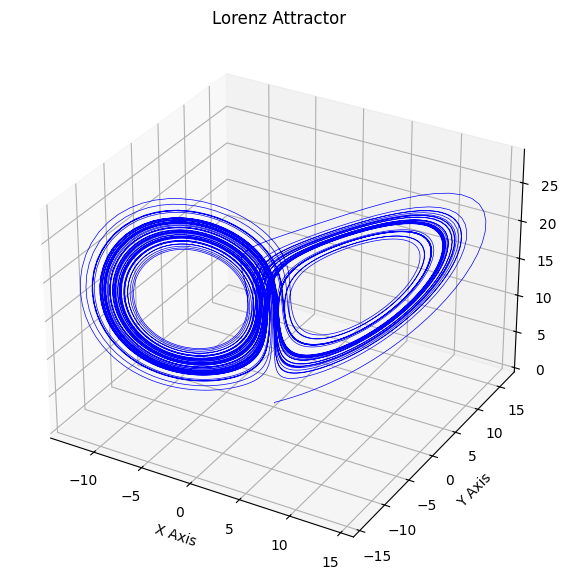

In [21]:
sigma = 15
rho = 16
beta = 2

initial_conditions = [0.1, 0, 0]
time_step = 0.01
steps = 10000

trajectory = np.empty((steps + 1, 3))
trajectory[0] = initial_conditions

for step in range(steps):
    x, y, z = trajectory[step]
    dx = sigma * (y - x)
    dy = x * (rho - z) - y
    dz = x * y - beta * z
    trajectory[step + 1] = [x + dx * time_step, y + dy * time_step, z + dz * time_step]

df_lorenz = pd.DataFrame(trajectory, columns=['x', 'y', 'z'])
df_lorenz.to_csv('task5.3.csv', index=False)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(projection='3d')
ax.plot(trajectory[:, 0], trajectory[:, 1], trajectory[:, 2], lw=0.5, color='blue')
ax.set_title('Lorenz Attractor')
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')
plt.show()